# 🧬 BioSLATE Project — Phase 1, Step 2: DepMap Cross-Validation

**Author:** Faith Ogundimu  
**Date:** June 2025  
**Notebook Purpose:**  
This notebook filters and analyses gene-level copy number data from the DepMap/CCLE resource, focusing on High-Grade Serous Ovarian Cancer (HGSOC) cell lines. It identifies genes that are frequently amplified or deleted in ≥5 HGSOC cell lines and cross-validates them against patient biomarkers identified in TCGA (Step 1).  
This work supports biomarker prioritisation for potential synthetic lethal therapy discovery.

---

> **Context:** This analysis follows Step 1, which identified candidate amplifications/deletions in TCGA patient tumours.  
> We now examine DepMap cell lines to determine which alterations are also present in experimental HGSOC models.

In [37]:
import pandas as pd

# read in file
cna_df = pd.read_csv("/Users/faith/Documents/GitHub/bioslate-hgsoc-core/database_files/DepMap/PortalOmicsCNGeneLog2.csv", index_col=0)
# This will make 'ACH-000628', 'ACH-000974', etc., become the row index (instead of just Row 0, Row 1, ...).

In [38]:
cna_df

,RHEB (6009),TIPIN (54962),OR4A47 (403253),NUP133 (55746),CPNE8-AS1 (107984504),PDIA4 (9601),RNU6-899P (106479964),NRXN1-DT (730100),SMIM41 (113523638),RPS12P2 (619448),...,RN7SKP98 (106480863),RPSAP15 (220885),FAM149B1P1 (388181),RNU6-1020P (106481503),MIR1285-1 (100302218),FXYD5 (53827),RNA5SP154 (100873420),TMEM87B (84910),RNU6-1313P (106480139),RNU6-1158P (106480076)
ACH-000628,0.793761,1.184616,1.131171,1.268654,0.794279,0.793761,1.059083,1.030760,0.741228,0.792282,...,1.268654,0.826410,1.184616,1.042520,0.820555,0.972534,1.006653,1.042657,0.763906,0.763906
ACH-000974,0.964018,1.000029,1.034741,1.113136,1.029907,0.964018,1.023490,1.012063,1.029907,1.021890,...,1.113136,1.049657,1.024187,1.013666,0.964018,0.999015,1.063114,1.014767,0.992166,0.992166
ACH-003071,1.087564,0.797982,1.117868,0.831680,1.275550,1.122626,1.092719,0.841562,1.084293,0.821380,...,0.839106,0.818258,0.777718,1.156527,1.134060,1.283460,0.909679,0.819009,1.034054,1.034054
ACH-001338,1.317029,0.991949,0.997558,0.999887,0.998826,1.317029,0.997558,1.003699,0.998826,0.587744,...,1.346365,0.550509,0.991949,0.997142,1.025293,0.944227,0.960986,0.952553,1.611404,1.558865
ACH-001608,1.181583,0.847391,1.249899,0.832738,0.910187,1.181583,1.236311,1.098020,0.840408,1.217445,...,0.858529,0.558322,0.907146,0.861149,1.188674,0.857482,0.905254,1.102438,1.162543,1.259503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ACH-001389,1.478427,1.557052,1.087244,0.796016,1.083903,1.478427,0.862105,0.825417,0.828557,1.125986,...,1.067785,0.451729,0.946827,0.857031,0.846909,0.826919,0.870262,0.836322,1.312687,1.630060
ACH-001835,0.776608,1.041576,1.288263,1.224820,1.020806,0.776608,1.288263,1.334160,1.020806,1.249726,...,1.244089,0.696845,1.041576,0.752644,1.451158,1.400238,0.753297,1.359141,1.228960,1.228960
ACH-000296,1.108399,0.888447,1.089862,1.384125,0.977655,1.131577,1.089862,1.070732,1.101768,1.029853,...,1.289639,0.415458,0.888447,1.091434,0.891331,1.038321,0.816961,1.063088,0.828367,0.825062
ACH-001971,1.656414,1.124559,1.143053,1.035250,1.089231,1.656414,0.903692,0.988930,1.089231,0.952405,...,1.080211,0.968565,1.124559,0.690957,1.606180,0.946726,0.918595,0.988930,1.068983,1.068983


## Step 1: Subsetting DepMap CNA Data to HGSOC Cell Lines

**Purpose:**  
This notebook isolates copy number alteration (CNA) data from DepMap for High-Grade Serous Ovarian Cancer (HGSOC) cell lines only. This is because https://depmap.org/portal/data_page/?release=DepMap+Public+24Q4&file=PortalOmicsCNGeneLog2.csv&tab=allData contains CN info for multiple cell lines not just HGSOC.  

DepMap Context Viewer to see all HGSOC cell lines:  
https://depmap.org/portal/context/High-Grade%20Serous%20Ovarian%20Cancer

In [39]:
hgsoc_cell_lines = pd.read_csv("/Users/faith/Documents/GitHub/bioslate-hgsoc-core/database_files/DepMap/cell lines in High-Grade Serous Ovarian Cancer.csv")
# The first row is treated as the header (column names) by default. (explicit; header=0)

In [40]:
hgsoc_cell_lines

,Depmap Id,Cell Line,Primary Disease,Tumor Type
0,ACH-000132,JHOS2,Ovarian Epithelial Tumor,Primary
1,ACH-002183,OVMIU,Ovarian Epithelial Tumor,NaN
2,ACH-001151,OVCAR5,Ovarian Epithelial Tumor,Metastatic
3,ACH-000635,SNU119,Ovarian Epithelial Tumor,Metastatic
4,ACH-000430,TYKNU,Ovarian Epithelial Tumor,Primary
5,ACH-002140,HEY,Ovarian Epithelial Tumor,Primary
6,ACH-000103,CAOV4,Ovarian Epithelial Tumor,Metastatic
7,ACH-000001,NIHOVCAR3,Ovarian Epithelial Tumor,Metastatic
8,ACH-000256,COV318,Ovarian Epithelial Tumor,Metastatic
9,ACH-000542,HEYA8,Ovarian Epithelial Tumor,Metastatic


In [59]:
cna_df_filtered = cna_df.loc[hgsoc_cell_lines["Depmap Id"]]

In [60]:
cna_df_filtered

,RHEB (6009),TIPIN (54962),OR4A47 (403253),NUP133 (55746),CPNE8-AS1 (107984504),PDIA4 (9601),RNU6-899P (106479964),NRXN1-DT (730100),SMIM41 (113523638),RPS12P2 (619448),...,RN7SKP98 (106480863),RPSAP15 (220885),FAM149B1P1 (388181),RNU6-1020P (106481503),MIR1285-1 (100302218),FXYD5 (53827),RNA5SP154 (100873420),TMEM87B (84910),RNU6-1313P (106480139),RNU6-1158P (106480076)
ACH-000132,1.029368,0.675483,1.149846,0.867362,1.044429,1.029368,1.141747,1.114393,0.994776,1.102393,...,0.479031,1.430699,1.113241,1.104895,0.661686,1.119210,0.705264,0.935732,1.195824,1.195824
ACH-002183,0.981266,0.951344,0.964016,1.336421,0.981230,0.981266,0.964016,0.967135,0.981230,0.983182,...,1.301606,0.852798,0.951344,0.974614,0.993510,1.000375,0.974561,0.977713,0.981904,0.981904
ACH-001151,0.921363,1.174023,1.197960,0.884346,0.959600,0.921363,1.190102,1.258202,0.858686,0.925456,...,0.937907,0.577166,1.229583,0.865415,0.935343,1.063702,0.962042,1.185818,1.144143,1.463407
ACH-000635,1.262903,0.753092,1.077517,1.291315,1.307322,1.262903,1.081227,1.072795,1.022470,0.790750,...,1.080605,0.474356,0.789536,0.750697,1.300275,1.262426,0.833488,1.308682,1.031222,1.063975
ACH-000430,1.420414,0.884105,1.156367,1.168365,0.890775,1.420414,1.156367,1.167760,0.890775,0.879134,...,1.168365,0.804875,0.874417,0.880093,1.414913,0.900395,0.867872,1.148953,0.914548,0.914548
ACH-002140,0.338121,0.873629,1.011571,0.869052,0.948762,0.338121,1.011571,1.011472,0.948762,1.027690,...,0.828571,0.561849,0.873629,1.150473,0.623486,1.040164,0.842503,1.017212,1.172833,1.172833
ACH-000103,1.165262,0.850423,0.808155,1.455622,1.146830,1.165262,0.808155,1.131607,1.146830,0.869160,...,0.966479,0.459685,0.841847,0.869173,1.165262,1.402803,1.175063,1.131607,1.153039,1.153039
ACH-000001,0.956619,1.056391,1.229718,1.119576,1.421059,0.956749,1.155812,0.959903,1.154655,1.162089,...,1.098675,0.978328,0.698191,1.225705,0.964623,1.481259,1.415230,0.960568,1.204170,1.466337
ACH-000256,1.392006,0.855593,0.691193,1.317037,1.125519,1.392006,1.130639,1.197064,0.891266,0.933399,...,1.330821,0.731294,0.880376,0.887462,1.451515,1.575292,0.899918,1.148287,0.897523,0.897523
ACH-000542,0.620004,0.835363,1.048825,0.831059,1.087975,0.620004,1.027667,1.038759,1.023777,1.066779,...,0.877901,0.683157,0.835363,1.158517,0.647264,0.998326,0.908402,1.041962,1.111500,1.115853


## Step 2: Stripping Gene Names for Consistency

**Purpose:**  
Depmap gene names contain a second code in parentheses, eg. RHEB (6009). Removal of this is important for contingency with TCGA data and subsequent downstream analyses.

In [61]:
# Strip anything after the first space and parenthesis from each column name
cna_df_filtered.columns = [col.split(" ")[0] for col in cna_df_filtered.columns]

In [62]:
cna_df_filtered

,RHEB,TIPIN,OR4A47,NUP133,CPNE8-AS1,PDIA4,RNU6-899P,NRXN1-DT,SMIM41,RPS12P2,...,RN7SKP98,RPSAP15,FAM149B1P1,RNU6-1020P,MIR1285-1,FXYD5,RNA5SP154,TMEM87B,RNU6-1313P,RNU6-1158P
ACH-000132,1.029368,0.675483,1.149846,0.867362,1.044429,1.029368,1.141747,1.114393,0.994776,1.102393,...,0.479031,1.430699,1.113241,1.104895,0.661686,1.119210,0.705264,0.935732,1.195824,1.195824
ACH-002183,0.981266,0.951344,0.964016,1.336421,0.981230,0.981266,0.964016,0.967135,0.981230,0.983182,...,1.301606,0.852798,0.951344,0.974614,0.993510,1.000375,0.974561,0.977713,0.981904,0.981904
ACH-001151,0.921363,1.174023,1.197960,0.884346,0.959600,0.921363,1.190102,1.258202,0.858686,0.925456,...,0.937907,0.577166,1.229583,0.865415,0.935343,1.063702,0.962042,1.185818,1.144143,1.463407
ACH-000635,1.262903,0.753092,1.077517,1.291315,1.307322,1.262903,1.081227,1.072795,1.022470,0.790750,...,1.080605,0.474356,0.789536,0.750697,1.300275,1.262426,0.833488,1.308682,1.031222,1.063975
ACH-000430,1.420414,0.884105,1.156367,1.168365,0.890775,1.420414,1.156367,1.167760,0.890775,0.879134,...,1.168365,0.804875,0.874417,0.880093,1.414913,0.900395,0.867872,1.148953,0.914548,0.914548
ACH-002140,0.338121,0.873629,1.011571,0.869052,0.948762,0.338121,1.011571,1.011472,0.948762,1.027690,...,0.828571,0.561849,0.873629,1.150473,0.623486,1.040164,0.842503,1.017212,1.172833,1.172833
ACH-000103,1.165262,0.850423,0.808155,1.455622,1.146830,1.165262,0.808155,1.131607,1.146830,0.869160,...,0.966479,0.459685,0.841847,0.869173,1.165262,1.402803,1.175063,1.131607,1.153039,1.153039
ACH-000001,0.956619,1.056391,1.229718,1.119576,1.421059,0.956749,1.155812,0.959903,1.154655,1.162089,...,1.098675,0.978328,0.698191,1.225705,0.964623,1.481259,1.415230,0.960568,1.204170,1.466337
ACH-000256,1.392006,0.855593,0.691193,1.317037,1.125519,1.392006,1.130639,1.197064,0.891266,0.933399,...,1.330821,0.731294,0.880376,0.887462,1.451515,1.575292,0.899918,1.148287,0.897523,0.897523
ACH-000542,0.620004,0.835363,1.048825,0.831059,1.087975,0.620004,1.027667,1.038759,1.023777,1.066779,...,0.877901,0.683157,0.835363,1.158517,0.647264,0.998326,0.908402,1.041962,1.111500,1.115853


In [63]:
cna_df_filtered.to_csv("/Users/faith/Documents/GitHub/bioslate-hgsoc-core/results/log2_cna_depmap_hgsoc.csv")

## Step 3: Exploring CN Distribution to Define Amplification/Deletion Thresholds

**Purpose:**  
This step visualises the distribution of log2-transformed copy number values across HGSOC cell lines from DepMap. A histogram is used to empirically guide the selection of thresholds for calling amplifications and deletions, ensuring alignment with GISTIC2-style scoring and biological expectations.

_Thresolds:_  
Amplification:   log2(CN + 1) ≥ +2.12 
Deletion:        log2(CN + 1) ≤ 0.9

In [65]:
flattened_values = cna_df_filtered.values.flatten()
# must use .values first because, .flatten() is not a method of a pandas DataFrame. It's a NumPy method used on arrays.
# or cna_df_filtered.to_numpy().flatten()

In [66]:
flattened_values

array([1.02936847, 0.67548251, 1.14984588, ..., 1.0029926 , 1.60865405,
       1.60865405])

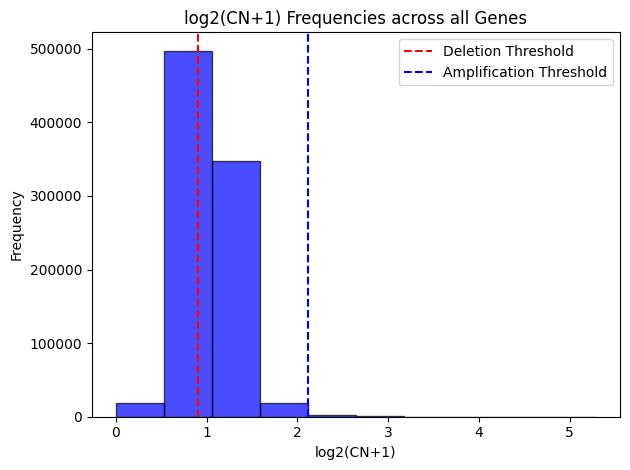

In [110]:
import matplotlib.pyplot as plt

plt.hist(
    flattened_values,
    color="blue",
    edgecolor="black",
    alpha=0.7
)

plt.title("log2(CN+1) Frequencies across all Genes")
plt.xlabel("log2(CN+1)")
plt.ylabel("Frequency")

# To add a vertical line at empirical thresholds
plt.axvline(x=0.9, color="red", linestyle="--", label="Deletion Threshold")
plt.axvline(x=2.12, color="blue", linestyle="--", label="Amplification Threshold")
plt.legend()

plt.tight_layout()
plt.show()

### 📊 Thresholding Strategy: Mimicking GISTIC-Like CNV Scoring in DepMap `log₂(CN + 1)` Data

In this analysis, we are working with **log₂-transformed gene-level copy number data** (`log₂(CN + 1)`) from the **DepMap 24Q4** release. Our goal is to mimic the **discrete CNV classification system** used by **GISTIC2.0** and **cBioPortal**, which categorises genomic alterations into:

* Deep deletions (`–2`)
* Shallow/heterozygous deletions (`–1`)
* Diploid (`0`)
* Low-level gains (`+1`)
* High-level amplifications (`+2`)

---

#### 🧠 Biological Grounding from Marco Mina (2022)

In the original CCLE pipeline (`log₂(CN / 2)`), thresholds were derived by translating real copy number values:

| CNV Category  | Linear CN (y) | Threshold in log₂(y/2) |
| ------------- | ------------- | ---------------------- |
| Deep deletion | `< 0.87`      | `< –1.20`              |
| Het loss      | `0.87 – 1.32` | `–1.20 to –0.60`       |
| Diploid       | `1.32 – 2.64` | `–0.60 to +0.40`       |
| Gain          | `2.64 – 3.36` | `+0.40 to +0.75`       |
| Amplified     | `> 3.36`      | `> +0.75`              |

Since my data is expressed as `log₂(CN + 1)`, we reverse-engineer these values to:

```python
x = log₂(y + 1)
```

---

#### ✅ Translated Thresholds for `log₂(CN + 1)`

| **CNV Category**         | **Linear CN (y)** | **log₂(CN + 1)** | **Interpretation**       |
| ------------------------ | ----------------- | ---------------- | ------------------------ |
| Deep deletion            | `< 0.87`          | `< 0.90`         | Homozygous deletion (–2) |
| Heterozygous loss        | `0.87 – 1.32`     | `0.90 – 1.21`    | Shallow deletion (–1)    |
| Diploid                  | `1.32 – 2.64`     | `1.21 – 1.86`    | Normal CN (0)            |
| Low-level gain           | `2.64 – 3.36`     | `1.86 – 2.12`    | Gain (+1)                |
| High-level amplification | `> 3.36`          | `> 2.12`         | Amplification (+2)       |
  
> 🧬 **Note**: These thresholds are biologically informed and account for noise in CNV calculations.

https://www.nature.com/articles/s41588-020-0703-5  
https://forum.depmap.org/t/defining-deep-deletions-and-amplifications/710/4

In [79]:
# Transpose DepMap dataframe for consistency with TCGA data and for downstream analyses.
cna_df_filtered = cna_df_filtered.transpose()

In [80]:
cna_df_filtered

,ACH-000132,ACH-002183,ACH-001151,ACH-000635,ACH-000430,ACH-002140,ACH-000103,ACH-000001,ACH-000256,ACH-000542,...,ACH-000524,ACH-000617,ACH-000116,ACH-000520,ACH-000278,ACH-000584,ACH-000713,ACH-000013,ACH-001628,ACH-000443
RHEB,1.029368,0.981266,0.921363,1.262903,1.420414,0.338121,1.165262,0.956619,1.392006,0.620004,...,1.492775,1.465910,1.232813,0.920994,1.374797,1.326493,1.091853,1.026320,1.104138,1.032057
TIPIN,0.675483,0.951344,1.174023,0.753092,0.884105,0.873629,0.850423,1.056391,0.855593,0.835363,...,0.822783,0.780983,1.173722,0.851020,1.080238,0.992830,1.107576,0.992843,1.181768,0.990342
OR4A47,1.149846,0.964016,1.197960,1.077517,1.156367,1.011571,0.808155,1.229718,0.691193,1.048825,...,1.126198,0.802233,1.003979,1.213961,1.130719,1.180767,1.600520,1.336951,0.822615,0.936520
NUP133,0.867362,1.336421,0.884346,1.291315,1.168365,0.869052,1.455622,1.119576,1.317037,0.831059,...,1.356128,0.780105,1.167453,1.099266,1.057016,1.102502,1.158097,1.001648,1.208648,1.031604
CPNE8-AS1,1.044429,0.981230,0.959600,1.307322,0.890775,0.948762,1.146830,1.421059,1.125519,1.087975,...,0.903640,1.720318,1.467580,1.154416,1.097670,0.966682,1.274657,1.325761,0.920681,1.065729
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
FXYD5,1.119210,1.000375,1.063702,1.262426,0.900395,1.040164,1.402803,1.481259,1.575292,0.998326,...,1.503043,1.615864,1.039811,1.148082,1.021742,1.354600,1.071800,1.216100,1.083277,1.060524
RNA5SP154,0.705264,0.974561,0.962042,0.833488,0.867872,0.842503,1.175063,1.415230,0.899918,0.908402,...,0.886802,0.826408,0.841337,0.910565,1.052659,0.747816,0.784326,1.491638,1.023038,1.307707
TMEM87B,0.935732,0.977713,1.185818,1.308682,1.148953,1.017212,1.131607,0.960568,1.148287,1.041962,...,1.178693,0.814455,1.247324,1.139127,1.163033,0.980118,1.168494,1.016322,1.002605,1.002993
RNU6-1313P,1.195824,0.981904,1.144143,1.031222,0.914548,1.172833,1.153039,1.204170,0.897523,1.111500,...,0.842150,0.762352,0.989183,1.087616,1.068805,0.983117,1.664590,1.263764,1.209426,1.608654


In [158]:
# Count how many cell lines have +2 or -2 per gene
amplified_counts = (cna_df_filtered >= 2.12).sum(axis=1)
deleted_counts = (cna_df_filtered <= 0.9).sum(axis=1)
# axis = 1 is the columns (i.e. what we want)

# Keep genes amplified or deleted in ≥5 cell lines
amp_genes_depmap = amplified_counts[amplified_counts >= 5].index
del_genes_depmap = deleted_counts[deleted_counts >= 5].index

# Final candidate genes = union of both
candidate_genes_depmap = amp_genes_depmap.union(del_genes_depmap)

In [159]:
candidate_genes_depmap

Index(['A1BG', 'A1BG-AS1', 'A1CF', 'A2M', 'A2M-AS1', 'A2ML1', 'A2ML1-AS1',
       'A2ML1-AS2', 'A2MP1', 'A3GALT2',
       ...
       'ZSWIM8-AS1', 'ZSWIM9', 'ZUP1', 'ZW10', 'ZWILCH', 'ZWINT', 'ZXDA',
       'ZXDB', 'ZYG11AP1', 'ZZEF1'],
      dtype='object', length=25976)

In [160]:
amp_genes_depmap

Index(['POU5F1B', 'OR4S2', 'MIR1206', 'RN7SKP206', 'CASC11', 'CASC19', 'PCAT1',
       'RNVU1-32', 'RNU4-25P', 'OR4V1P', 'RN7SKP226', 'CCL4L2', 'LINC00824',
       'RNU1-5P', 'RNU6-912P', 'MIR1208', 'PRNCR1', 'CASC8', 'RNU1-2', 'GSDMC',
       'OR4P1P', 'OR2T11', 'MTRF1LP2', 'RNU6-869P', 'OR4C6', 'CCL3L3',
       'MIR3686', 'CCAT2', 'OR4P4', 'MYC', 'LINC02912', 'KNOP1P5', 'RFPL4AP5',
       'PVT1', 'MIR1207', 'RNU11-4P', 'LINC00861', 'OR4C11', 'MIR1205',
       'ABCD1P2', 'MIR1204', 'LRATD2', 'OR2T10', 'CCDC26'],
      dtype='object')

In [161]:
del_genes_depmap

Index(['TIPIN', 'NUP133', 'SMIM41', 'CES4A', 'TCTE1', 'RPL32P26', 'PNCK',
       'CNOT10-AS1', 'OR3A2', 'COL6A2',
       ...
       'BMP4', 'MYH13', 'RNU6-430P', 'MTMR3', 'RN7SKP98', 'RPSAP15',
       'FAM149B1P1', 'RNU6-1020P', 'MIR1285-1', 'RNA5SP154'],
      dtype='object', length=25934)

## Step 4: Cross-Validation of CNA Candidates in TCGA Tumour Samples

**Purpose:**
To ensure that high-confidence CNAs identified in **DepMap HGSOC cell lines** are also **clinically relevant**, we cross-validate them against patient tumour data from **TCGA HGSOC**. This step improves translational robustness by identifying CNAs consistently observed in both *in vitro* and *in vivo* contexts.

### 🎯 Why Cross-Validate?

> **Not all CNAs in cell lines are clinically significant.**
> Cross-validation ensures that we retain only those alterations that are also **frequent, strong, and reproducible** in actual tumour tissues — making them better candidates for **therapeutic targeting or biomarker development**.


In [182]:
# Read in TCGA candidate genes
candidate_genes_tcga = pd.read_csv("/Users/faith/Documents/GitHub/bioslate-hgsoc-core/results/final_candidate_biomarkers.csv", index_col=0)

In [183]:
candidate_genes_tcga = candidate_genes_tcga.index
candidate_genes_tcga

Index(['A1BG', 'A2M', 'A2ML1', 'AACS', 'AAGAB', 'AAK1', 'AAMDC', 'AAR2',
       'AARS', 'AARS2',
       ...
       'ZNHIT6', 'ZNRF2', 'ZPR1', 'ZRANB2', 'ZSCAN18', 'ZSWIM8', 'ZW10',
       'ZYG11B', 'ZYX', 'ZZEF1'],
      dtype='object', name='Gene', length=6428)

In [190]:
candidate_genes_cross_val = candidate_genes_tcga.intersection(candidate_genes_depmap)
candidate_genes_cross_val

Index(['A1BG', 'A2M', 'A2ML1', 'AACS', 'AAGAB', 'AARS2', 'AARSD1', 'AASS',
       'AATF', 'ABAT',
       ...
       'ZNF768', 'ZNF787', 'ZNF800', 'ZNF830', 'ZNF841', 'ZPR1', 'ZSCAN18',
       'ZSWIM8', 'ZW10', 'ZZEF1'],
      dtype='object', length=3865)

In [146]:
# Convert to a DataFrame first
candidate_genes_df = candidate_genes_cross_val.to_frame(name="Gene")

# reset index if needed
candidate_genes_df.reset_index(drop=True, inplace=True)

# Save to CSV
candidate_genes_df.to_csv("/Users/faith/Documents/GitHub/bioslate-hgsoc-core/results/candidate_genes_cross_validated.csv", index=False)

#### Amplified Genes Cross Validation

In [205]:
### Amplified Genes Cross Validation
amp_genes_tcga = pd.read_csv("/Users/faith/Documents/GitHub/bioslate-hgsoc-core/results/amp_genes_tcga.csv", index_col=0)

In [206]:
amp_genes_tcga

,Gene
0,AGRN
1,ATAD3A
2,ATAD3B
3,B3GALT6
4,CDK11B
...,...
5584,FUNDC2
5585,MPP1
5586,TMLHE
5587,VBP1


In [195]:
amp_genes_depmap = amp_genes_depmap.to_frame(name="Gene")

# reset index if needed
amp_genes_depmap.reset_index(drop=True, inplace=True)

amp_genes_depmap

,Gene
0,POU5F1B
1,OR4S2
2,MIR1206
3,RN7SKP206
4,CASC11
5,CASC19
6,PCAT1
7,RNVU1-32
8,RNU4-25P
9,OR4V1P


In [207]:
# Extract the gene names (assuming the column is called 'Gene')
genes_tcga = amp_genes_tcga['Gene']
genes_depmap = amp_genes_depmap['Gene']

# Find common genes
cross_val_amp_genes = genes_tcga[genes_tcga.isin(genes_depmap)].reset_index(drop=True)
cross_val_amp_genes

Series([], Name: Gene, dtype: object)

#### Deleted Genes Cross Validation

In [230]:
### Deleted Genes Cross Validation
del_genes_tcga = pd.read_csv("/Users/faith/Documents/GitHub/bioslate-hgsoc-core/results/del_genes_tcga.csv", index_col=0)
del_genes_tcga

,Gene
0,AGRN
1,ATAD3A
2,ATAD3B
3,B3GALT6
4,CDK11B
...,...
1348,FUNDC2
1349,MPP1
1350,TMLHE
1351,VBP1


In [210]:
del_genes_depmap = del_genes_depmap.to_frame(name="Gene")

# reset index if needed
del_genes_depmap.reset_index(drop=True, inplace=True)

del_genes_depmap

,Gene
0,TIPIN
1,NUP133
2,SMIM41
3,CES4A
4,TCTE1
...,...
25929,RPSAP15
25930,FAM149B1P1
25931,RNU6-1020P
25932,MIR1285-1


In [211]:
# Extract the gene names (assuming the column is called 'Gene')
del_genes_tcga = del_genes_tcga['Gene']
del_genes_depmap = del_genes_depmap['Gene']

# Find common genes
cross_val_del_genes = del_genes_tcga[del_genes_tcga.isin(del_genes_depmap)].reset_index(drop=True)
cross_val_del_genes

0          AGRN
1       B3GALT6
2        CDK11B
3          GNB1
4         ISG15
         ...   
1194     FUNDC2
1195       MPP1
1196      TMLHE
1197       VBP1
1198      VAMP7
Name: Gene, Length: 1199, dtype: object

In [212]:
cross_val_del_genes.to_csv("../results/cross_val_del_genes.csv")